# Final Project 
## Lawrence Liu 
### 11.24.2025
---

#### Q1: Read in the data, call the dataframe "s"  and check the dimensions of the dataframe


In [1]:
import pandas as pd 
import numpy as np 


s = pd.read_csv('social_media_usage.csv')
s.shape
s.head()
s.columns
s.shape

(1502, 89)

---

#### Q2: Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected

In [2]:
def clean_sm(x):
    x = np.where(x == 1 , 1, 0)
    return x

data = [[1, 2], [3, 1], [4, 5]]
toy = pd.DataFrame(data, columns=['A', 'B'])
clean_sm(toy)

array([[1, 0],
       [0, 1],
       [0, 0]])

In [3]:
np.unique(s['income'])
s['par']

0       2
1       2
2       2
3       2
4       2
       ..
1497    1
1498    2
1499    2
1500    2
1501    1
Name: par, Length: 1502, dtype: int64

#### Q3: Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

In [ ]:
ss = pd.DataFrame(
    {
        'sm_li' : clean_sm(s['web1h']),
        'income' : np.where(s['income'] <= 9 , s['income'] , np.nan),
        'education': np.where(s['educ2'] <= 8 , s['educ2'], np.nan),
        'parent' : clean_sm(s['par']),
        'married' : clean_sm(s['marital']),
        'female' : np.where(s['gender'] == 2, 1, 0),
        'age' : np.where(s['age'] < 98 , s['age'] , np.nan)
    } 
)



In [28]:
ss.shape

(1502, 7)

In [29]:
ss= ss.dropna()

---

#### perform EDA:


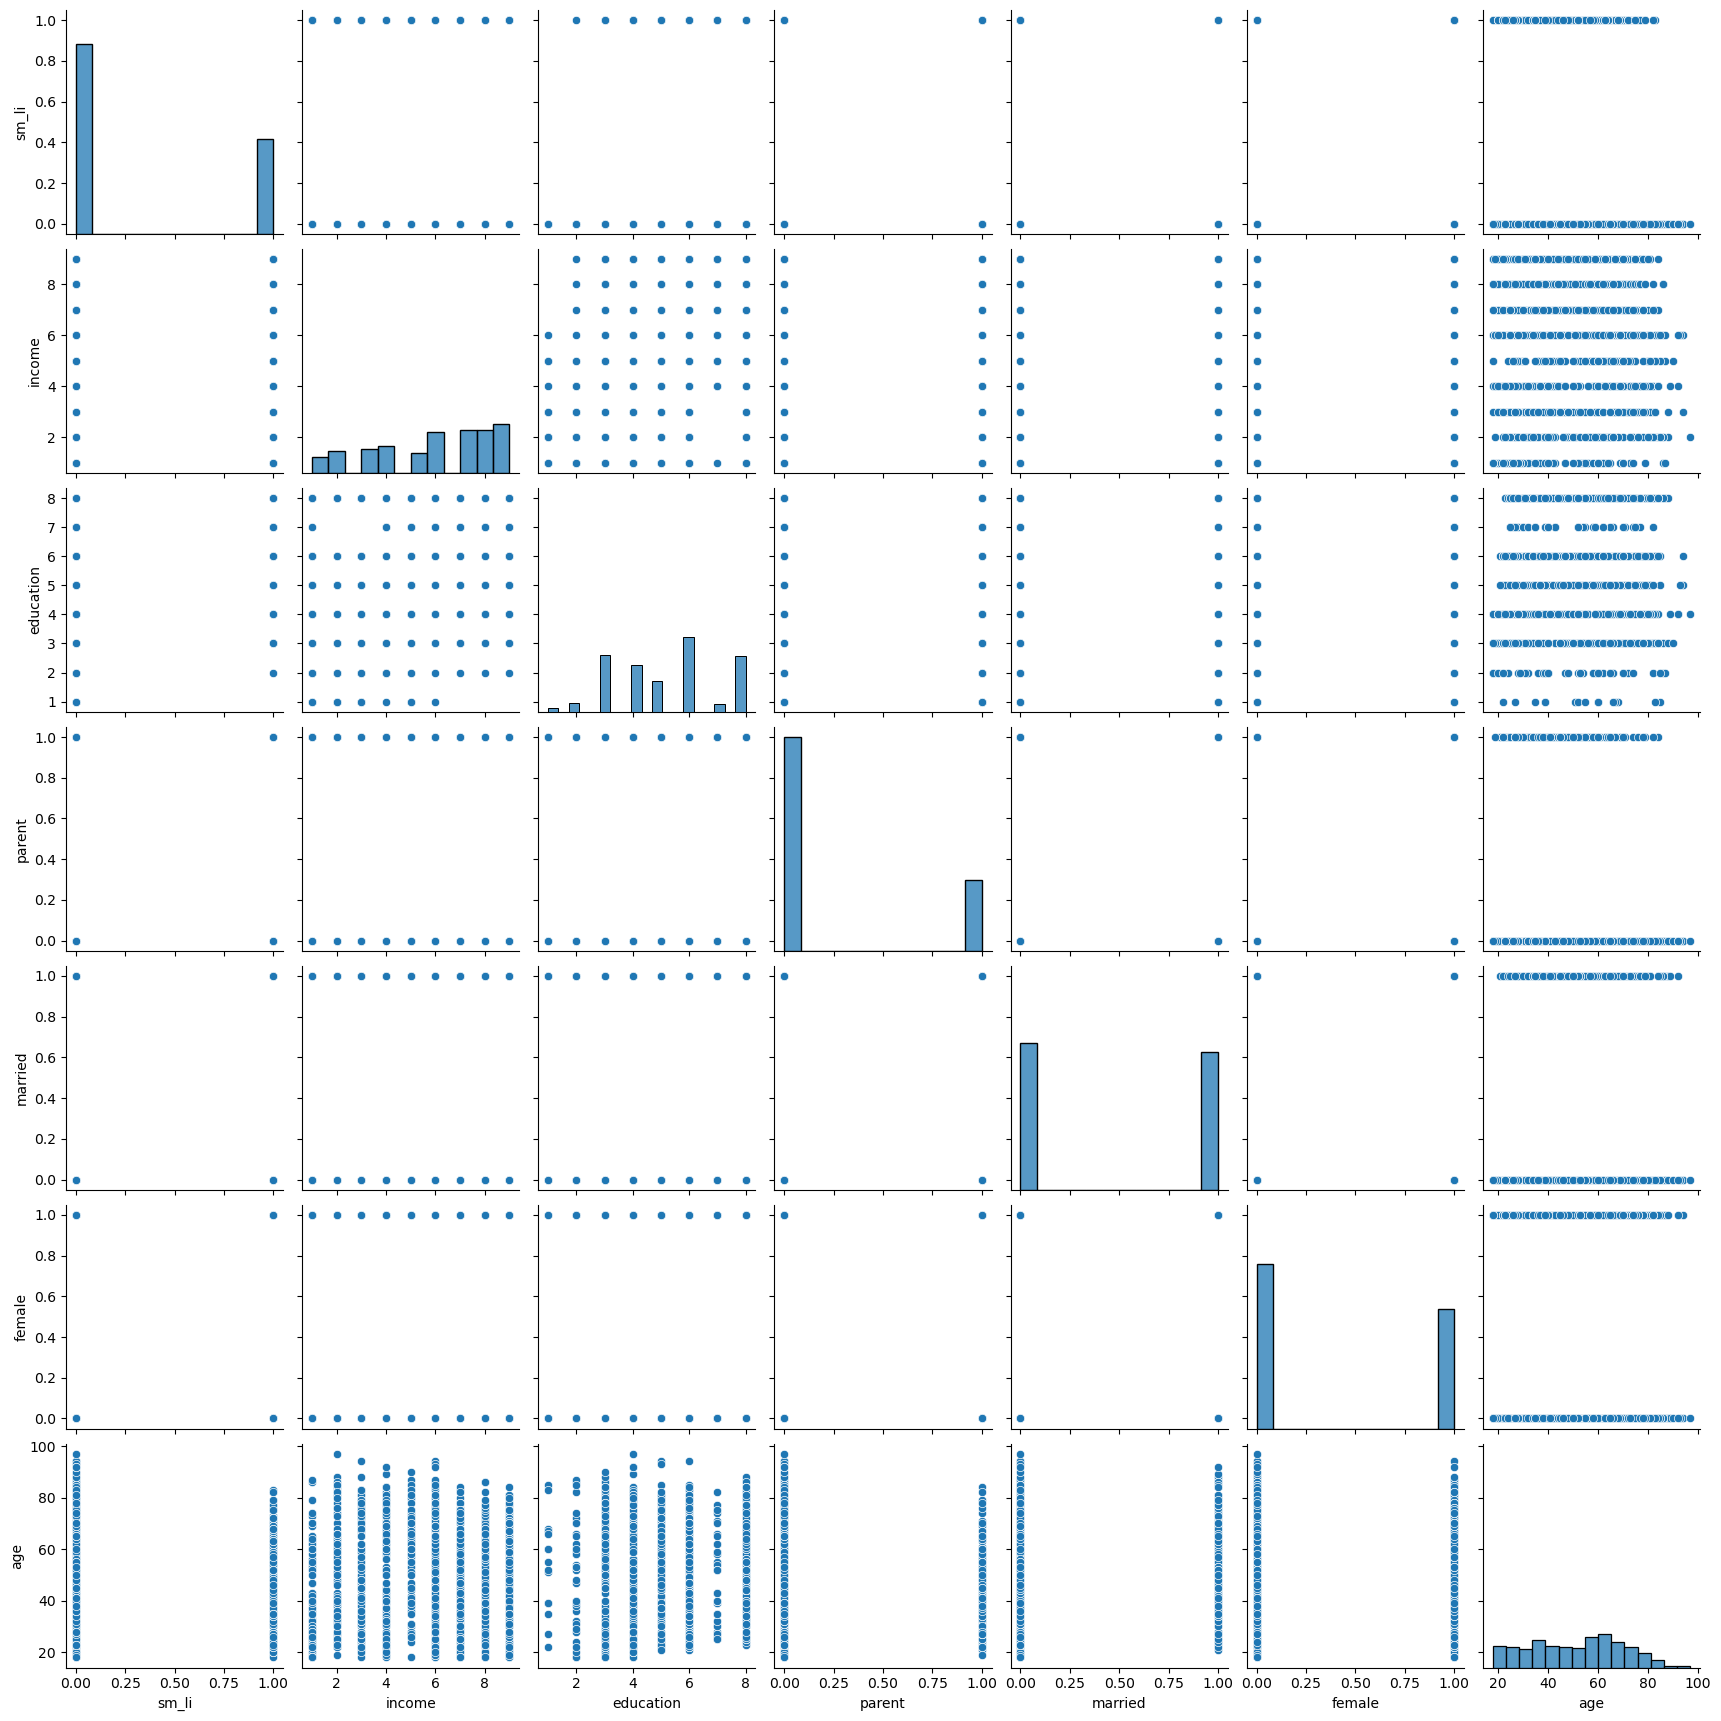

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.pairplot(data=ss)
plt.show()

first examine the target variable sm_li

---

EDA on the variables:

In [8]:
sm_li_counts = ss['sm_li'].value_counts()
sm_li_counts_perc = ss['sm_li'].value_counts(normalize= True)* 100



In [10]:
ss.columns

Index(['sm_li', 'income', 'education', 'parent', 'married', 'female', 'age'], dtype='object')

In [31]:
import altair as alt 
## create a value to see the LinkedIn user distribution
sm_chart = alt.Chart(ss).mark_bar().encode(
    x= alt.X('sm_li:N' , title = 'LinkedIn User (0 = Not a User, 1 = LinkedIn User)'),
    y = alt.Y('count()', title = 'Value Counts'), 
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn User Distribution'
)

sm_chart_income = alt.Chart(ss).mark_bar().encode(
    x=alt.X('income:O', title = 'Income Level (1 = Low , 9 = High)'), 
    y = alt.Y('count()' , title = 'Value Count per Income Class'),
    color = alt.Color('sm_li:N',  legend = alt.Legend(title = 'LinkedIn User'))
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn Usage by Income Level'
)
sm_chart_edu = alt.Chart(ss).mark_bar().encode(
    x=alt.X('education:O', title = 'education Level (1 = Low , 8 = High)'), 
    y = alt.Y('count()' , title = 'Value Count per education level'),
    color = alt.Color('sm_li:N',  legend = alt.Legend(title = 'LinkedIn User'))
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn Usage by education Level'
)
sm_chart_parent = alt.Chart(ss).mark_bar().encode(
    x=alt.X('parent:O', title = 'Parent (0 = No , 1 = Yes)'), 
    y = alt.Y('count()' , title = 'Value Count per by parent status'),
    color = alt.Color('sm_li:N',  legend = alt.Legend(title = 'LinkedIn User'))
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn Usage by parent status'
)
sm_chart_married = alt.Chart(ss).mark_bar().encode(
    x=alt.X('married:O', title = 'Marital status (0 = No , 1 = Yes)'), 
    y = alt.Y('count()' , title = 'Value Count per by Marital status status'),
    color = alt.Color('sm_li:N',  legend = alt.Legend(title = 'LinkedIn User'))
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn Usage by parent status'
)
sm_chart_gender = alt.Chart(ss).mark_bar().encode(
    x=alt.X('female:O', title = 'Gender (0 = Male , 1 = Female)'), 
    y = alt.Y('count()' , title = 'Value Count per by Gender'),
    color = alt.Color('sm_li:N',  legend = alt.Legend(title = 'LinkedIn User'))
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn Usage by Gender'
)
sm_chart_age = alt.Chart(ss).mark_bar().encode(
    x=alt.X('age:N' , bin = alt.Bin(maxbins = 10)),
    y = alt.Y('count()', stack = None),
    color =alt.Color('sm_li:N'),
    xOffset='sm_li:N'
).properties(
    width = 350,
    height = 350,
    title = 'LinkedIn Usage by Age'
)


# Combine all charts into one dashboard
# Row 1: Distribution, Income, Education
row1 = alt.hconcat(sm_chart_income, sm_chart_edu , sm_chart_parent)

# Row 2: Parent, Married, Gender
row2 = alt.hconcat(sm_chart_married, sm_chart_gender, sm_chart_age)


# Final Dashboard
dashboard = alt.vconcat(
    row1,
    row2
).properties(
    title=alt.TitleParams(
        text='LinkedIn Usage - Exploratory Data Analysis Dashboard',
        fontSize=20,
        fontWeight='bold',
        anchor='middle'
    )
).configure_axis(
    labelFontSize=11,
    titleFontSize=12
).configure_title(
    fontSize=14,
    fontWeight='bold'
)

dashboard

alt.VConcatChart(...)

In [32]:
import altair as alt 

## create a value to see the LinkedIn user distribution
sm_chart = alt.Chart(ss).mark_bar().encode(
    x=alt.X('sm_li:N', title='LinkedIn User (0 = Not a User, 1 = LinkedIn User)'),
    y=alt.Y('count()', title='Value Counts'),
    tooltip=['sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn User Distribution'
)

sm_chart_income = alt.Chart(ss).mark_bar().encode(
    x=alt.X('income:O', title='Income Level (1 = Low , 9 = High)'), 
    y=alt.Y('count()', title='Value Count per Income Class'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['income:O', 'sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn Usage by Income Level'
)

sm_chart_edu = alt.Chart(ss).mark_bar().encode(
    x=alt.X('education:O', title='Education Level (1 = Low , 8 = High)'), 
    y=alt.Y('count()', title='Value Count per Education Level'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['education:O', 'sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn Usage by Education Level'
)

sm_chart_parent = alt.Chart(ss).mark_bar().encode(
    x=alt.X('parent:O', title='Parent (0 = No , 1 = Yes)'), 
    y=alt.Y('count()', title='Value Count by Parent Status'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['parent:O', 'sm_li:N', 'count()']
).properties(
    width=400,
    height=400,
    title='LinkedIn Usage by Parent Status'
)

sm_chart_married = alt.Chart(ss).mark_bar().encode(
    x=alt.X('married:O', title='Marital Status (0 = No , 1 = Yes)'), 
    y=alt.Y('count()', title='Value Count by Marital Status'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['married:O', 'sm_li:N', 'count()']
).properties(
    width=300,
    height=400,
    title='LinkedIn Usage by Marital Status'
)

sm_chart_gender = alt.Chart(ss).mark_bar().encode(
    x=alt.X('female:O', title='Gender (0 = Male , 1 = Female)'), 
    y=alt.Y('count()', title='Value Count by Gender'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    tooltip=['female:O', 'sm_li:N', 'count()']
).properties(
    width=300,
    height=400,
    title='LinkedIn Usage by Gender'
)

sm_chart_age = alt.Chart(ss).mark_area().encode(
    x=alt.X('age:Q', title='Age'),
    y=alt.Y('count()', stack=None, title='Count'),
    color=alt.Color('sm_li:N', legend=alt.Legend(title='LinkedIn User')),
    xOffset='sm_li:N',
    tooltip=['age:Q', 'sm_li:N', 'count()']
).properties(
    width=600,
    height=400,
    title='LinkedIn Usage by Age'
)

# Combine all charts into one dashboard
row1 = alt.hconcat(sm_chart_income, sm_chart_edu, sm_chart_parent)
row2 = alt.hconcat(sm_chart_married, sm_chart_gender, sm_chart_age)

# Final Dashboard
dashboard = alt.vconcat(
    row1,
    row2
).properties(
    title=alt.TitleParams(
        text='LinkedIn Usage - Exploratory Data Analysis Dashboard',
        fontSize=20,
        fontWeight='bold',
        anchor='middle'
    )
).configure_axis(
    labelFontSize=11,
    titleFontSize=12
).configure_title(
    fontSize=14,
    fontWeight='bold'
)

dashboard

alt.VConcatChart(...)

In [73]:
import altair as alt

# Create correlation matrix
corr_matrix = ss.corr()

# Convert to long format for Altair
corr_data = corr_matrix.stack().reset_index()
corr_data.columns = ['Feature1', 'Feature2', 'Correlation']

# Create heatmap
fig_corr = alt.Chart(corr_data).mark_rect().encode(
    x=alt.X('Feature1:N', title='Features'),
    y=alt.Y('Feature2:N', title='Features'),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redblue', domain=[-1, 1])),
    tooltip=['Feature1', 'Feature2', alt.Tooltip('Correlation:Q', format='.2f')]
).properties(
    width=900,
    height=900,
    title='Feature Correlation Matrix'
)
fig_corr


alt.Chart(...)

#### Q4: Create a target vector (y) and feature set (X)

In [33]:
# the target variable is y 

target_variables = ss['sm_li']

# define the features 

features = ss.drop('sm_li' , axis =1)


In [34]:
features.describe()

,income,education,parent,married,female,age
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,5.865873,5.203175,0.249206,0.483333,0.419841,51.253968
std,2.474385,1.877501,0.432725,0.499921,0.493729,18.403705
min,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000
25%,4.000000,4.000000,0.000000,0.000000,0.000000,36.000000
50%,6.000000,5.000000,0.000000,0.000000,0.000000,52.000000
75%,8.000000,6.000000,0.000000,1.000000,1.000000,65.000000
max,9.000000,8.000000,1.000000,1.000000,1.000000,97.000000


#### Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    features, 
    target_variables, 
    test_size= 0.20, 
    random_state=42
)

In [36]:
X_train.describe()

,income,education,parent,married,female,age
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,5.833333,5.183532,0.242063,0.485119,0.428571,51.552579
std,2.482511,1.880503,0.428545,0.500027,0.495117,18.493221
min,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000
25%,4.000000,4.000000,0.000000,0.000000,0.000000,36.000000
50%,6.000000,5.000000,0.000000,0.000000,0.000000,53.000000
75%,8.000000,6.000000,0.000000,1.000000,1.000000,66.000000
max,9.000000,8.000000,1.000000,1.000000,1.000000,97.000000


- X_train produces a training dataset containing 80% of the data (necessary to compare the fitted model on the test dataset). this dataset is of the predictors 
- y_train produces a training dataset containing 80% of the data (necessary to compare the fitted model ). This dataset contains only the target variable

- X_test prododuces a testing dataset containing 20% of the data (necessary to check the trained model on the testing set). This datast contains the predictors
- y_test prodices a testing dataset containing 20% of the data (necessary to check the trained model on the testing set). This dataset contains only the target variable

---

Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

## first we need to set up cross validation 

cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state=42)

## set up the pipeline 

knn_pipeline = Pipeline(steps = [ 
    ("imputer" , KNNImputer(n_neighbors=5)),
    ("scaler" , StandardScaler()),
    ("model", LogisticRegression(class_weight='balanced' , max_iter=2500 , random_state=42))
])

scores_knn = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='accuracy'
)

print("KNN imputation + pipeline CV accuracy:", scores_knn.mean())

KNN imputation + pipeline CV accuracy: 0.6795822865868676



In-sample confusion matrix (threshold = 0.5):
          Pred 0  Pred 1
Actual 0      99      62
Actual 1      24      67

Precision (train): 0.519
Recall (train):    0.736


<Axes: >

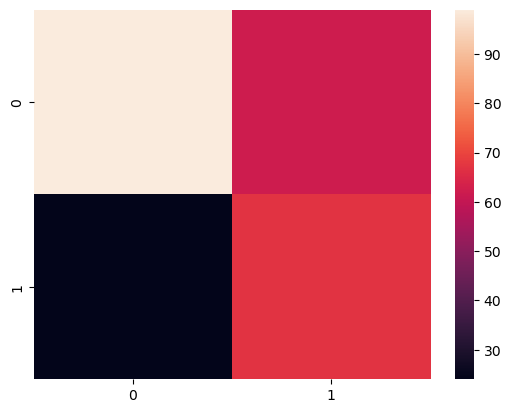

In [52]:
# ROC/AUC/Precision/Recall on original (unbalanced) TRAIN set, using probabilities

# Predicted probabilities on training data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score


# calculate precision and recall
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
precision_train = precision_score(y_test, y_pred)
recall_train = recall_score(y_test, y_pred)

print("\nIn-sample confusion matrix (threshold = 0.5):")
print(pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
))
print(f"\nPrecision (train): {precision_train:.3f}")
print(f"Recall (train):    {recall_train:.3f}")

sns.heatmap(cm)


---

Manually create correlation table , precision , recall , and f1 statistics

In [44]:
cm

array([[99, 62],
       [24, 67]])

In [54]:
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]




- TN : True Negative (Non LinkedIn Users corrected predicted as non-users)
- FP : False Positive (Non LinkedIn Users incorrecpted predicted as users (type 1 error))
- FN: False Negative (LinkedIn Users who are incorecttely predicted as non LinkedIn Users (type 2))
- TP: True Positive ( LinkedIn Users who are correctly predicted as LinkedIn Users)

In [57]:
precision_manual = TP / (TP + FP)
recall_manual = TP / (TP+FN)



In [58]:
precision_manual

np.float64(0.5193798449612403)

In [59]:
recall_manual

np.float64(0.7362637362637363)

In [60]:
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)
f1_manual = 2*(precision_manual * recall_manual) / (precision_manual + recall_manual)


In [61]:
accuracy_manual

np.float64(0.6587301587301587)

In [62]:
f1_manual

np.float64(0.6090909090909091)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Fit the pipeline
knn_pipeline.fit(X_train, y_train)

# Get predicted probabilities (need probabilities for ROC, not just predictions)
y_pred_proba = knn_pipeline.predict_proba(X_test)[:, 1]  # probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

In [ ]:
## 

In [69]:
## making prediction predictors 

## person 1 
person1 = pd.DataFrame({
    'income': [8],        # High income ($100k-$150k)
    'education': [7],     # Some postgraduate schooling
    'parent': [0],        # Not a parent
    'married': [1],       # Married
    'female': [1],        # Female
    'age': [42]           # 42 years old
})

# Person 2: Same as Person 1 but 82 years old
person2 = pd.DataFrame({
    'income': [8],
    'education': [7],
    'parent': [0],
    'married': [1],
    'female': [1],
    'age': [82]           # 82 years old
})

# Get predictions and probabilities
pred1 = knn_pipeline.predict(person1)[0]
prob1 = knn_pipeline.predict_proba(person1)[0]

pred2 = knn_pipeline.predict(person2)[0]
prob2 = knn_pipeline.predict_proba(person2)[0]
print(f"Prediction: {'LinkedIn User' if pred1 == 1 else 'Not a LinkedIn User'}")
print(f"Probability of NOT being a LinkedIn user: {prob1[0]*100:.2f}%")
print(f"Probability of being a LinkedIn user: {prob1[1]*100:.2f}%")

Prediction: LinkedIn User
Probability of NOT being a LinkedIn user: 26.05%
Probability of being a LinkedIn user: 73.95%


In [ ]:
print(pred1)

0
